In [1]:
from fvhoe.hydro import advection_dt
from fvhoe.initial_conditions import square
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f0(x, y, z):
    return square(x, y, z, dims="xy", vx=2, vy=1)

In [3]:
N = 64
p = 3
solver = EulerSolver(
    w0=f0,
    nx=N,
    ny=N,
    px=p,
    py=p,
    riemann_solver="advection_upwind",
    fixed_dt=advection_dt(hx=1 / N, hy=1 / N, vx=2, vy=1),
    a_posteriori_slope_limiting=True,
    slope_limiter="minmod",
    cupy=True,
    snapshot_dir="../../snapshots",
)

In [4]:
solver.rkorder(1, downbeats=[0.5], filename="linear_advection_of_a_square_2d")

100%|██████████| 1.0/1 [00:50]                 

Snapshots saved to ../../snapshots/linear_advection_of_a_square_2d7


t=1.00, x=[0.01, 0.99], y=[0.01, 0.99], z=0.50
horizontal_axis='x', vertical_axis='y'
t=1.00, x=[0.01, 0.99], y=[0.01, 0.99], z=0.50
horizontal_axis='x', vertical_axis='y'
t=1.00, x=[0.01, 0.99], y=[0.01, 0.99], z=0.50
horizontal_axis='x', vertical_axis='y'
t=1.00, x=[0.01, 0.99], y=[0.01, 0.99], z=0.50
horizontal_axis='x', vertical_axis='y'


Text(0.5, 0, '$x$')

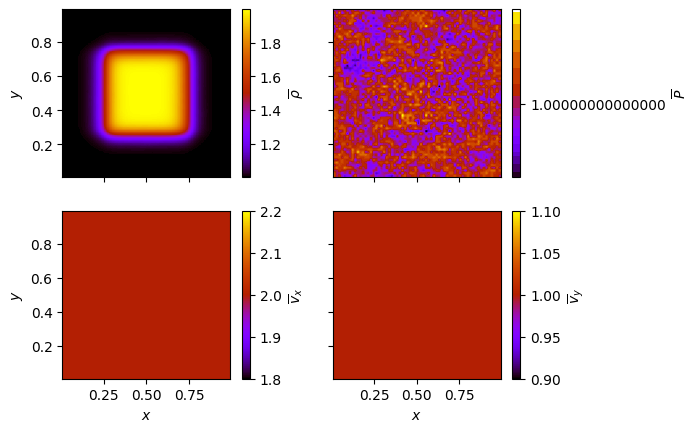

In [5]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

for var, label, idx in zip(
    ["rho", "P", "vx", "vy"],
    [r"$\overline{\rho}$", r"$\overline{P}$", r"$\overline{v}_x$", r"$\overline{v}_y$"],
    [(0, 0), (0, 1), (1, 0), (1, 1)],
):
    im = solver.plot_2d_slice(ax[idx], t=1, param=var, cmap="gnuplot", z=0.5)
    fig.colorbar(im, ax=ax[idx], label=label)

ax[0, 0].set_ylabel("$y$")
ax[1, 0].set_ylabel("$y$")
ax[1, 0].set_xlabel("$x$")
ax[1, 1].set_xlabel("$x$")

In [6]:
for n in [0, -1]:
    m_tot = np.sum(solver.snapshots[0]["w"].rho[:, 0, 0]) * (
        solver.h[0] * solver.h[1] * solver.h[2]
    )
    print(f"Total mass at time {solver.snapshot_times[n]}: {m_tot}")

Total mass at time 0: 0.015625
Total mass at time 1.0: 0.015625


In [7]:
print(f"min rho at latest snapshot: {np.min(solver.snapshots[-1]['w'].rho)}")
print(f"max rho at latest snapshot: {np.max(solver.snapshots[-1]['w'].rho)}")

min rho at latest snapshot: 1.0000000002341085
max rho at latest snapshot: 1.9998568736471674
